# Bank data

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

## 1. Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 2. Import the dataset

In [2]:
bank_data=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<center>This is how the data looks</center>

## 3. Description of Data Frame

In [4]:
# Only numerical columns will be listed.
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Listing columns into numerical and categorical

In [6]:
all_columns = bank_data.columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

- Let's check for the frequency of labels in our dataset.

In [7]:
bank_data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
bank_data.y.value_counts()/bank_data.y.count()

no     0.883015
yes    0.116985
Name: y, dtype: float64

- This is a high class imbalance problem, with the number of `yes` as **5289** and `no` as **39922**. If we predict `no` for every case we will get the accuracy of our model as `accuracy = 5289/45211 * 100 = 88.3015 %`.
- For handeling this Class imbalance problem, Since we have enough data for our minority class, so we can to undersample our data. We will do it in Preprocessing.

## 4. Preprocessing

### Undersampling

Undersampling will be done based on y (the dependent variable). The result will contain all the instances of minority class and randomly choose same number of instances for the majority class.

In [9]:
import imblearn
imblearn.__version__

'0.7.0'

In [10]:
# Undersampling based on y.
Under_Sampler = imblearn.under_sampling.RandomUnderSampler(random_state=42)
bank_sampled_X, bank_sampled_y = Under_Sampler.fit_resample(bank_data.iloc[:, :-1], bank_data.y)
bank_sampled = pd.concat([bank_sampled_X,bank_sampled_y], axis=1)
bank_sampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,unemployed,single,secondary,no,1055,no,no,cellular,28,jan,196,1,-1,0,unknown,no
1,36,blue-collar,married,secondary,no,520,yes,no,unknown,23,may,110,2,-1,0,unknown,no
2,38,technician,single,tertiary,no,1314,yes,yes,cellular,16,jul,378,2,-1,0,unknown,no
3,41,unemployed,married,tertiary,no,28,yes,no,cellular,4,feb,358,2,-1,0,unknown,no
4,27,technician,single,tertiary,no,290,no,no,cellular,10,aug,88,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
10574,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
10575,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
10576,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [11]:
bank_sampled.y.value_counts()

no     5289
yes    5289
Name: y, dtype: int64

- Now our data has 50-50 percent division of both the classes.

### Checking for null values

In [12]:
bank_sampled.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.189355,1528.343354,15.516638,380.883059,2.493855,51.955663,0.860560
std,12.007143,3124.718140,8.412610,353.020396,2.649877,108.890295,3.534368
min,18.000000,-3058.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,144.000000,1.000000,-1.000000,0.000000
50%,39.000000,554.000000,15.000000,259.000000,2.000000,-1.000000,0.000000
75%,49.000000,1707.750000,21.000000,515.000000,3.000000,43.750000,1.000000
max,95.000000,81204.000000,31.000000,4918.000000,63.000000,854.000000,275.000000


In [13]:
bank_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10578 non-null  int64 
 1   job        10578 non-null  object
 2   marital    10578 non-null  object
 3   education  10578 non-null  object
 4   default    10578 non-null  object
 5   balance    10578 non-null  int64 
 6   housing    10578 non-null  object
 7   loan       10578 non-null  object
 8   contact    10578 non-null  object
 9   day        10578 non-null  int64 
 10  month      10578 non-null  object
 11  duration   10578 non-null  int64 
 12  campaign   10578 non-null  int64 
 13  pdays      10578 non-null  int64 
 14  previous   10578 non-null  int64 
 15  poutcome   10578 non-null  object
 16  y          10578 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
bank_sampled.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So no NaN values are found in this dataset. So we can say that there are no null values for the numerical columns/features but we cannot say this for Categorical columns. Let's check for categorical columns.

In [15]:
for column in categorical_columns:
    print('*'*20 + ' ' + column + ' ' + 20*'*')
    print(bank_sampled[column].value_counts())

******************** job ********************
management       2367
blue-collar      1940
technician       1736
admin.           1229
services          859
retired           749
unemployed        365
self-employed     354
student           350
entrepreneur      287
housemaid         275
unknown            67
Name: job, dtype: int64
******************** marital ********************
married     5967
single      3388
divorced    1223
Name: marital, dtype: int64
******************** education ********************
secondary    5215
tertiary     3466
primary      1438
unknown       459
Name: education, dtype: int64
******************** default ********************
no     10430
yes      148
Name: default, dtype: int64
******************** housing ********************
no     5581
yes    4997
Name: housing, dtype: int64
******************** loan ********************
no     9185
yes    1393
Name: loan, dtype: int64
******************** contact ********************
cellular     7639
unknown      

So there are:
- 67 unknown in `job`
- No unknown in `maritial`
- 459 unknown in `education`
- No unknown in `default`, but it is highley skwed.
- No unknown in `housing`
- No unknown in `loan`, but it is skwed
- 2199 unknown in `contact`
- No unknown in `month`
- 7866 unknown in `poutcome`

So, we need to focous on `job`, `education`, `contact` and `poutcome` for null values. We can remove the rows where `job` and `maritial` is unknown but we cannot do it for `contact` and `poutcome` because `contact` is unknown for lots of values and `poutcome` is unknown for almost all of the data. Hence we will not use `contact` and `poutcome` in our model.

`default` and `loan` are skwed so we will consider them after Exploratory Data Analysis.

## 5. Exploratory Data Analysis

## 1.) Univariate Analysis

### a. Histograms

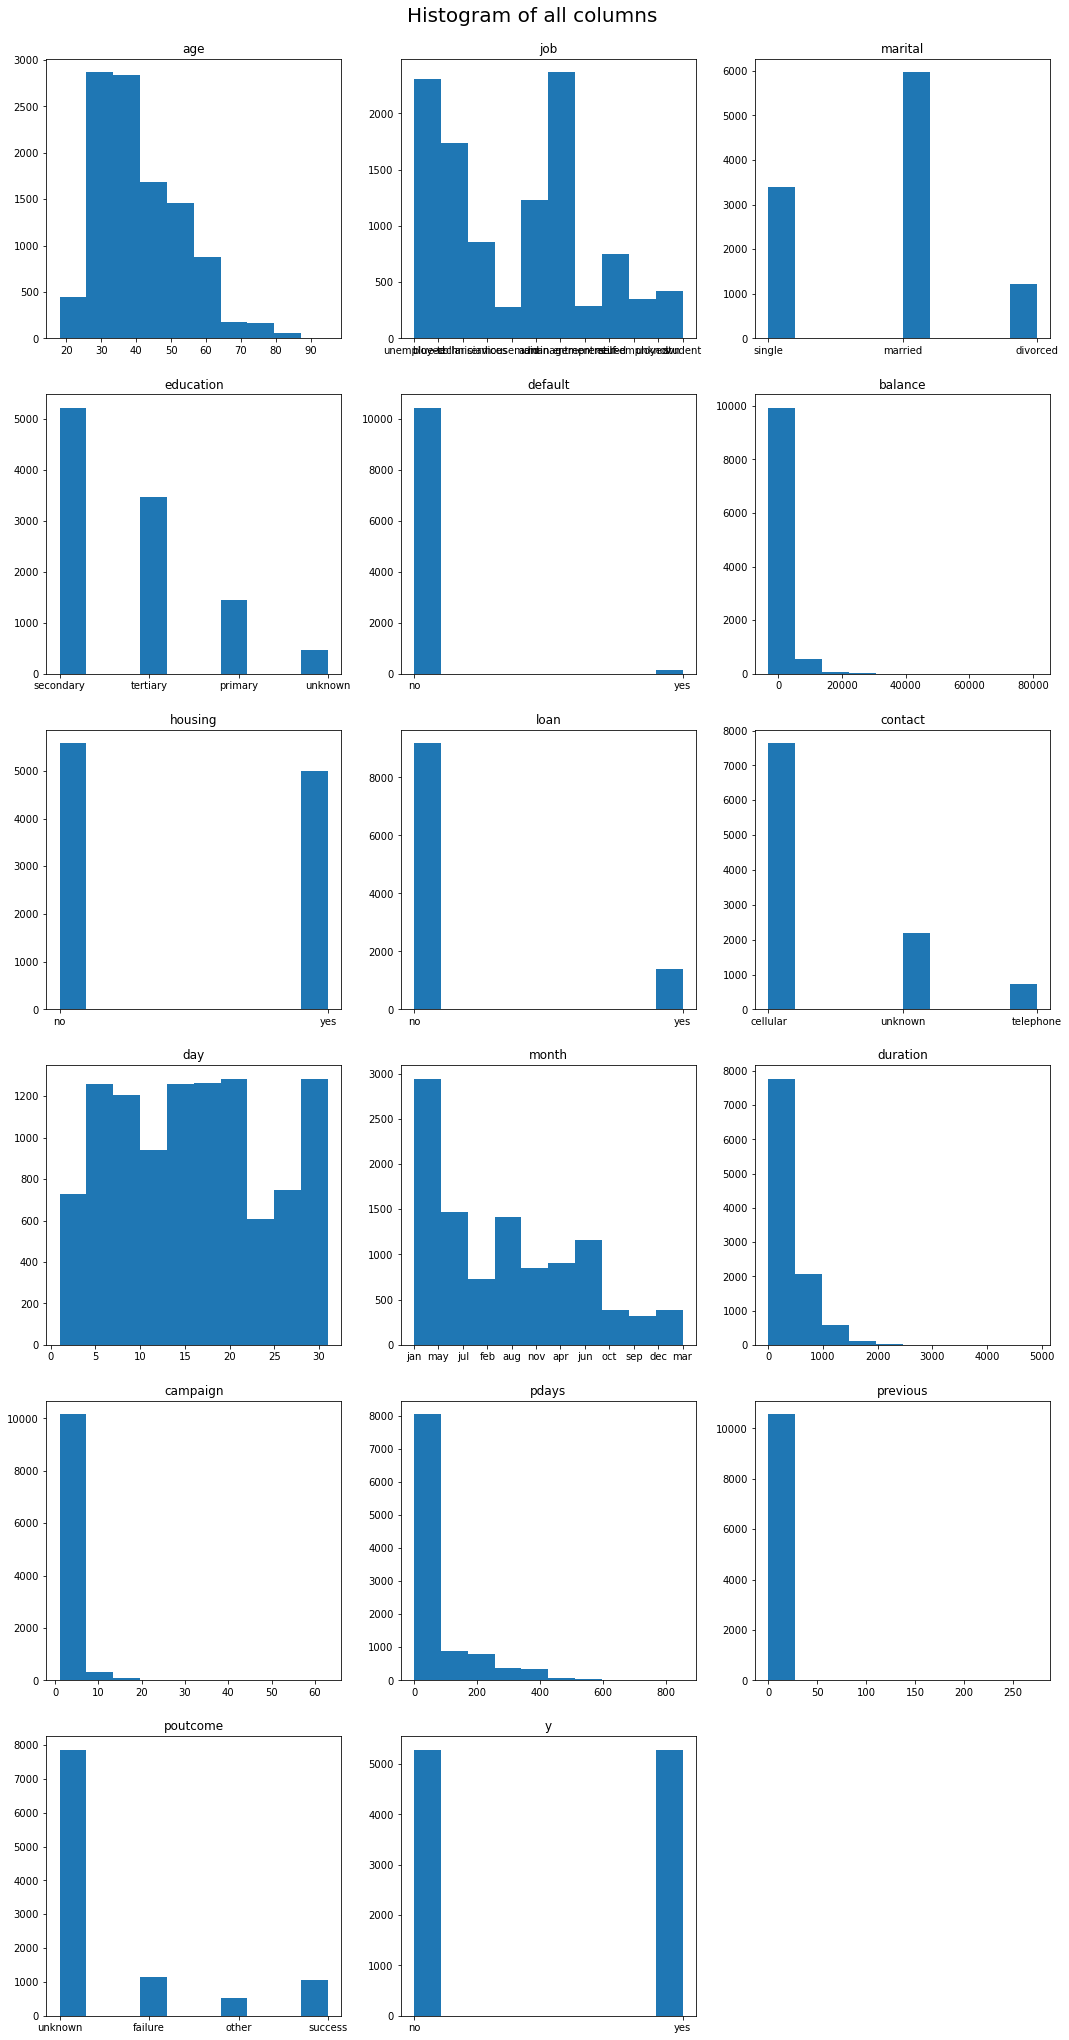

In [96]:
plt.figure(figsize=[18,36])
for i, column in enumerate(all_columns):
    plt.subplot(6, 3, i+1)
    plt.hist(bank_sampled[column])
    plt.title(column)
plt.suptitle('Histogram of all columns', size=20, y=0.9)
plt.show()

### b. Boxplot for Numerical Columns

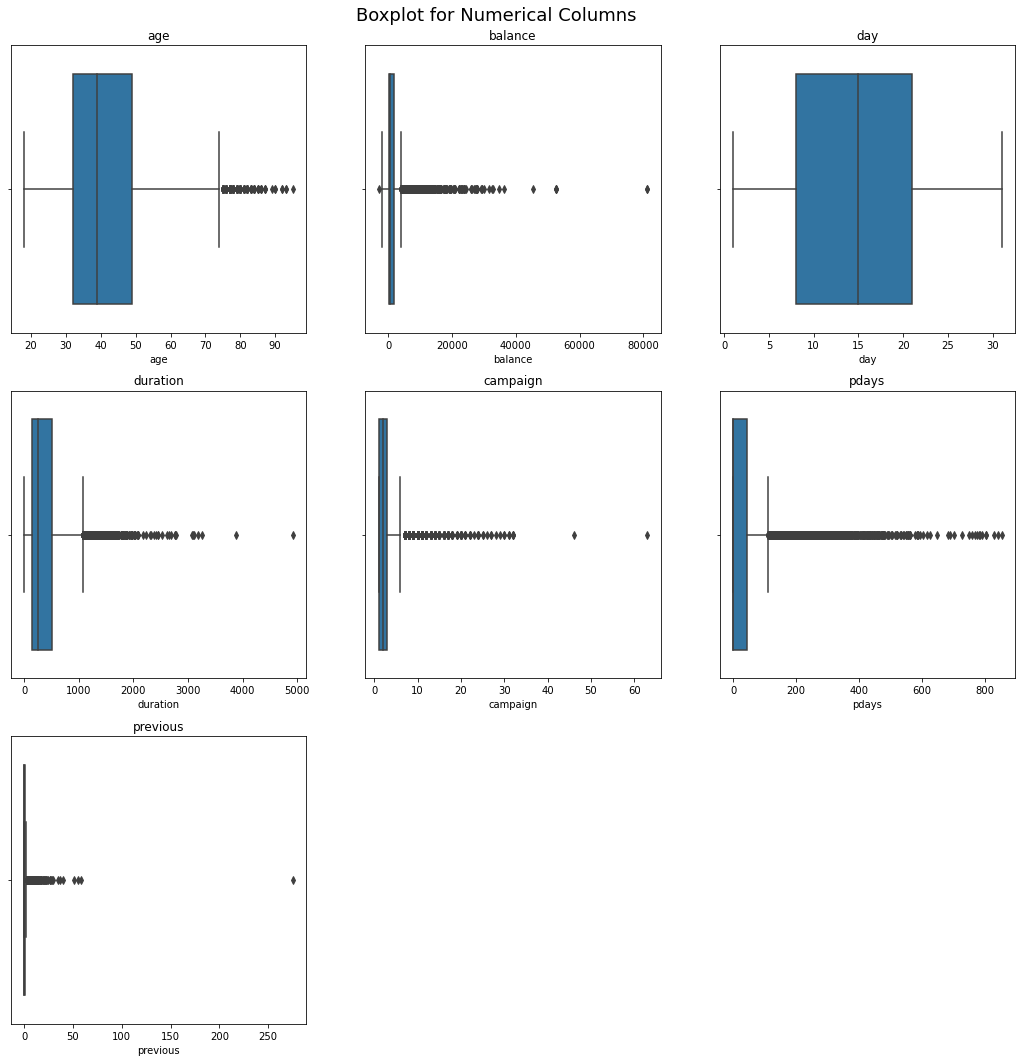

In [55]:
%matplotlib inline
plt.figure(figsize=[18,18])
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(bank_sampled[column])
    plt.title(column)
plt.suptitle('Boxplot for Numerical Columns', size=18, y=0.91)
plt.show()

### c. Count plot for categorical columns

<AxesSubplot:title={'center':'Count plot for "job" column'}, xlabel='job', ylabel='count'>

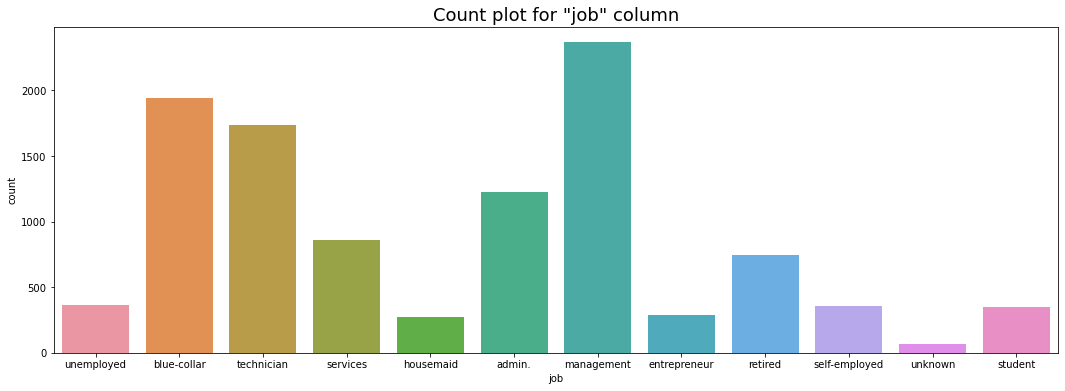

In [97]:
# Bar plot for 'job' column
plt.figure(figsize=[18,6])
plt.title('Count plot for "job" column', size=18)
# plt.bar(x = bank_data.job.value_counts().index, height=bank_data.job.value_counts())
sns.countplot(bank_sampled.job)

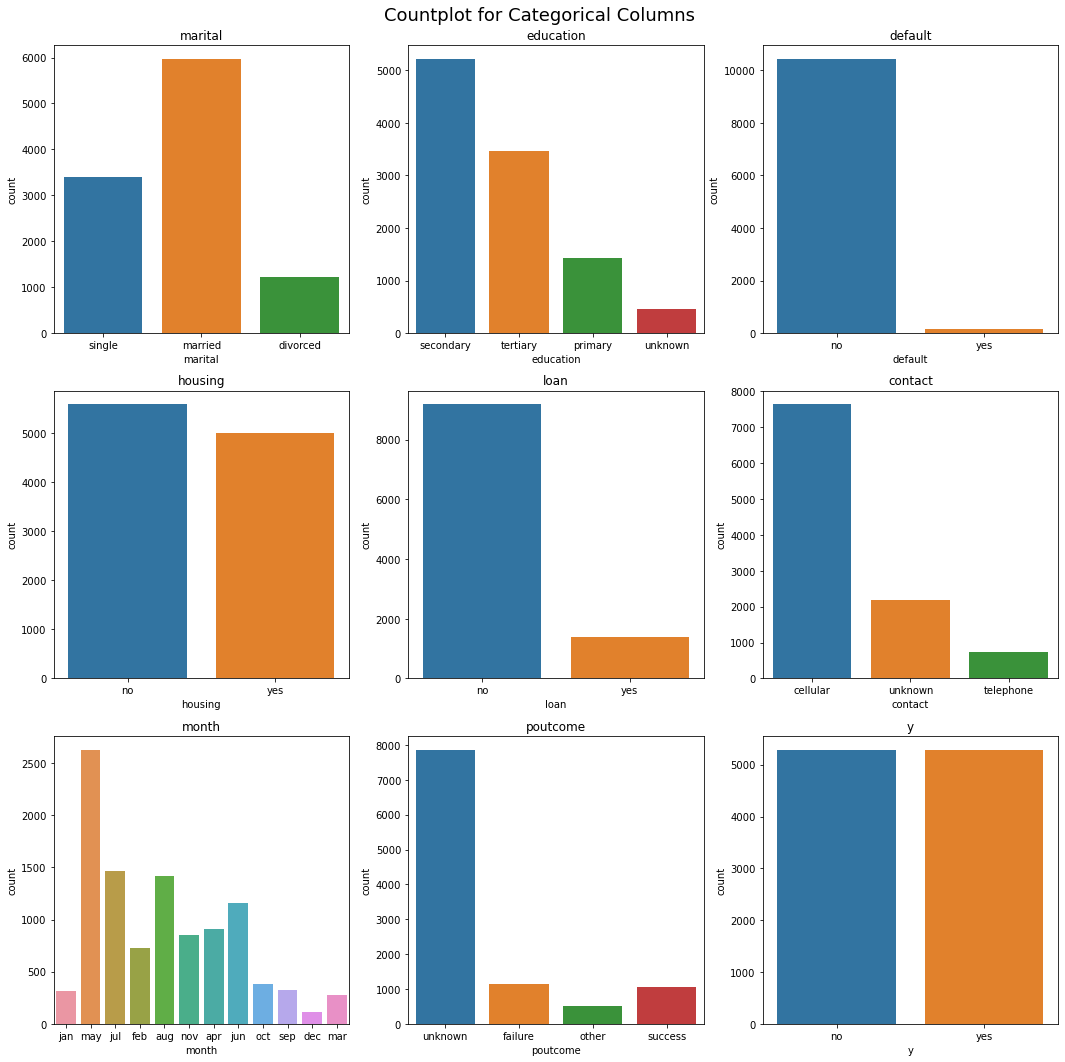

In [69]:
# Count plot for all columns other than job
plt.figure(figsize=[18,18])
for i, column in enumerate(categorical_columns[1:]):
    plt.subplot(3, 3, i+1)
#     plt.bar(x = bank_data[column].value_counts().index, height=bank_data[column].value_counts())
    sns.countplot(x = bank_sampled[column])
    plt.title(column)
plt.suptitle('Countplot for Categorical Columns', size=18, y=0.91)
plt.show()

### d. Pie charts for Categorical Columns

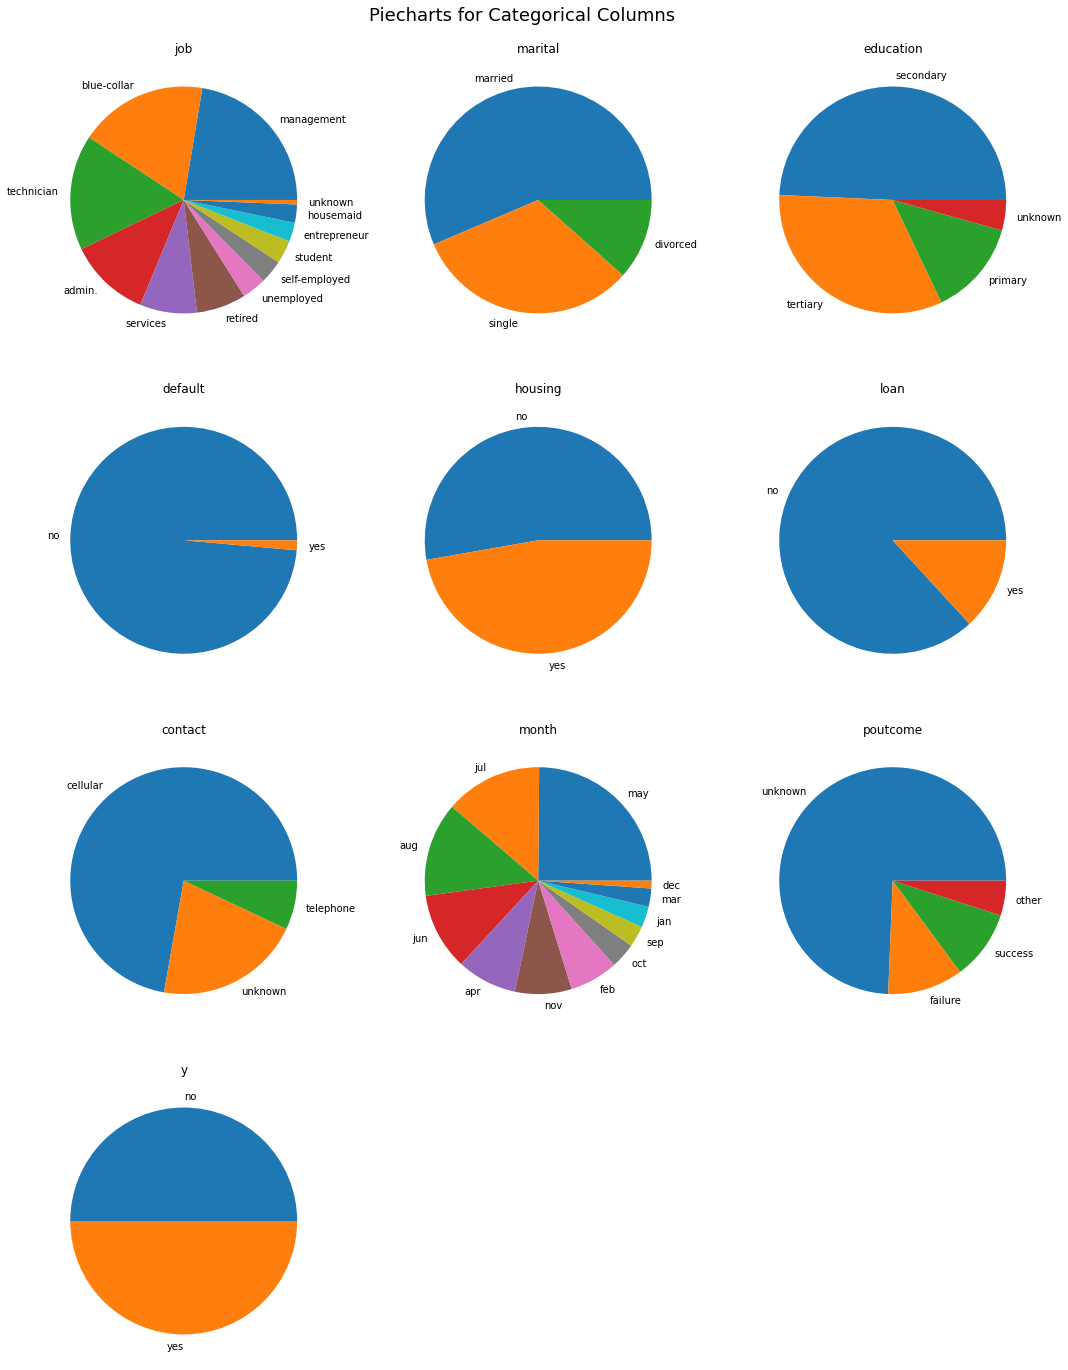

In [77]:
plt.figure(figsize=[18, 24])
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 3, i+1)
    plt.pie(x=bank_sampled[column].value_counts(), labels=bank_sampled[column].value_counts().index)
    plt.title(column)
plt.suptitle('Piecharts for Categorical Columns', size=18, y=0.91)
plt.show()

## 2.) Bivariate Analysis

### a. Boxplot for numerical columns

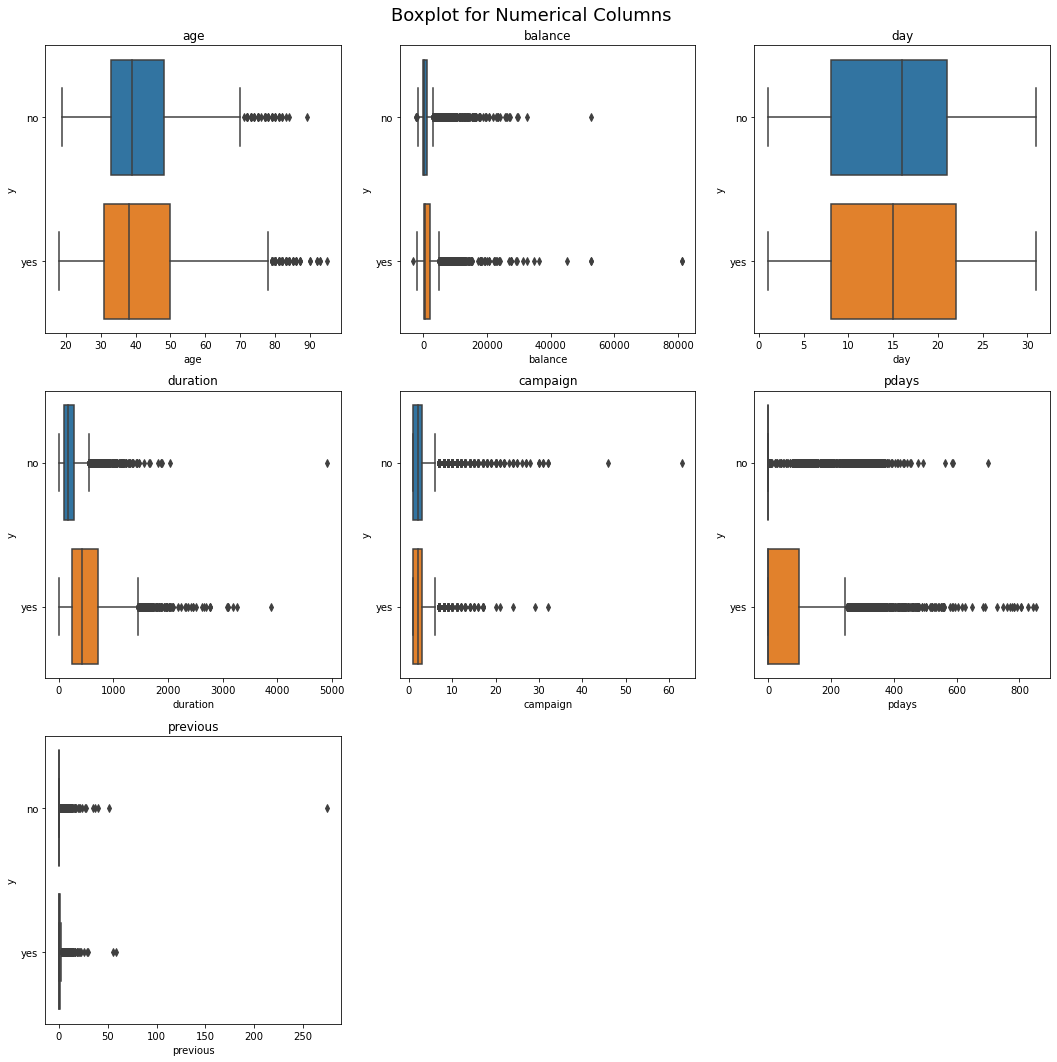

In [90]:
plt.figure(figsize=[18, 18])
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = bank_sampled[column], y = bank_sampled.y)
    plt.title(column)
plt.suptitle('Boxplot for Numerical Columns', size=18, y=0.91)
plt.show()

### b. Barplot for numerical columns

[]

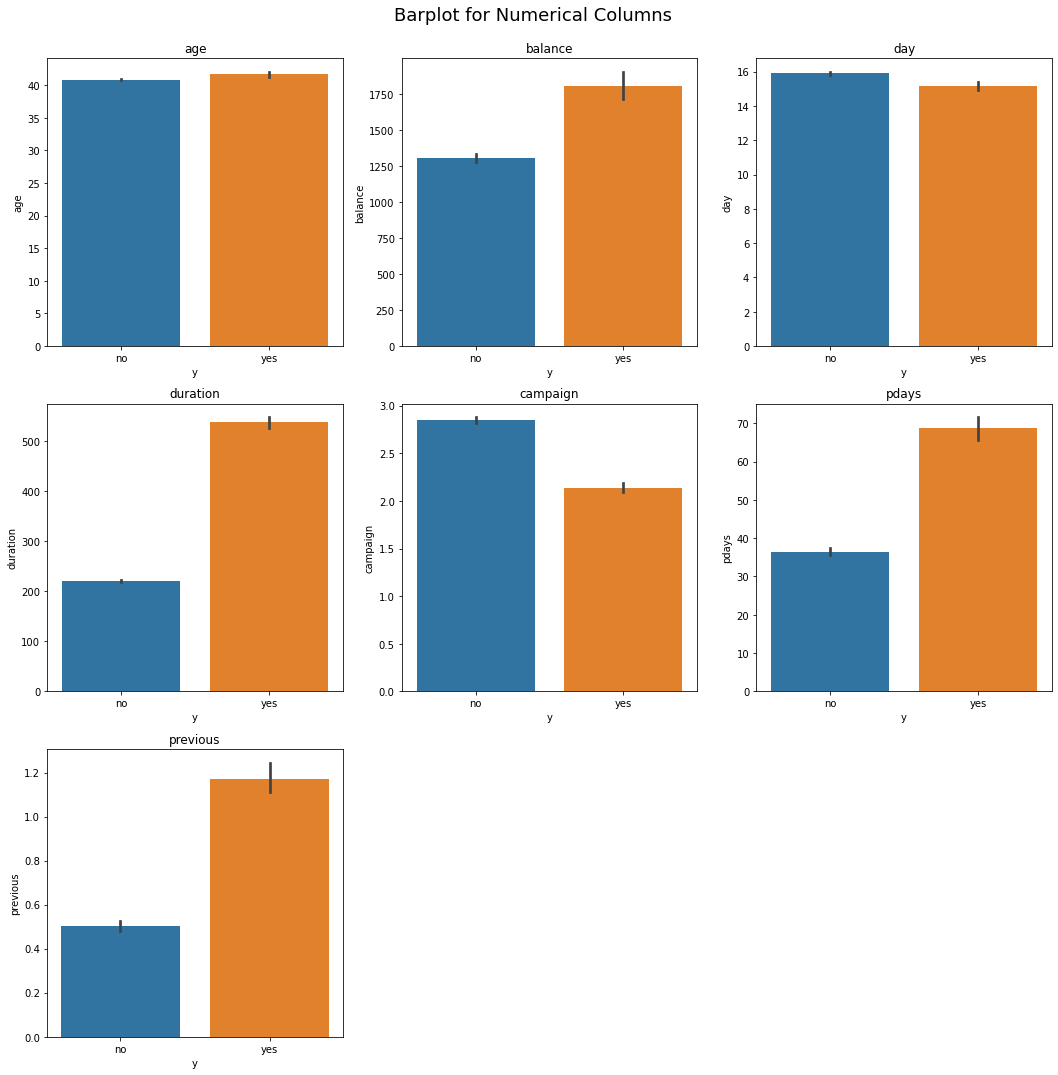

In [84]:
plt.figure(figsize=[18, 18])
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.barplot(x = 'y', y = column, data=bank_data)
    plt.title(column)
plt.suptitle('Barplot for Numerical Columns', size=18, y=0.92)
plt.plot()

### c. Countplot for Categorical Columns

Text(0.5, 1.0, 'Countplot for "job" column')

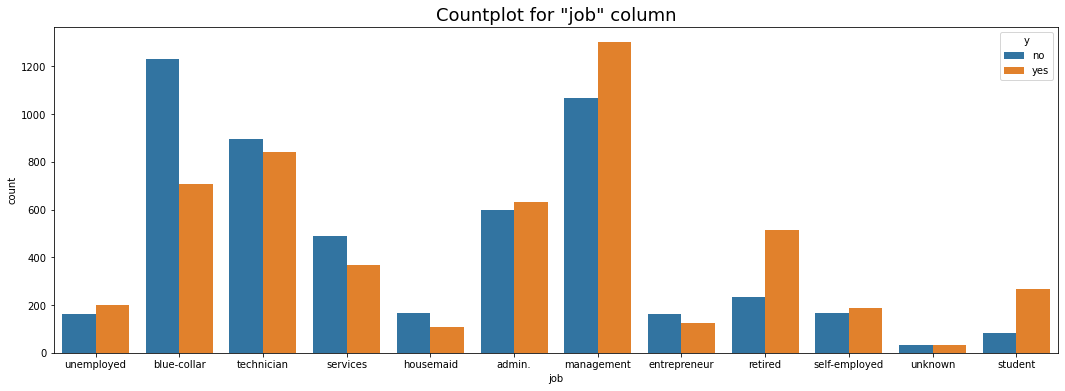

In [87]:
plt.figure(figsize=[18,6])
sns.countplot(x = 'job', hue = 'y' ,data=bank_sampled)
plt.title('Countplot for "job" column', size=18)

[]

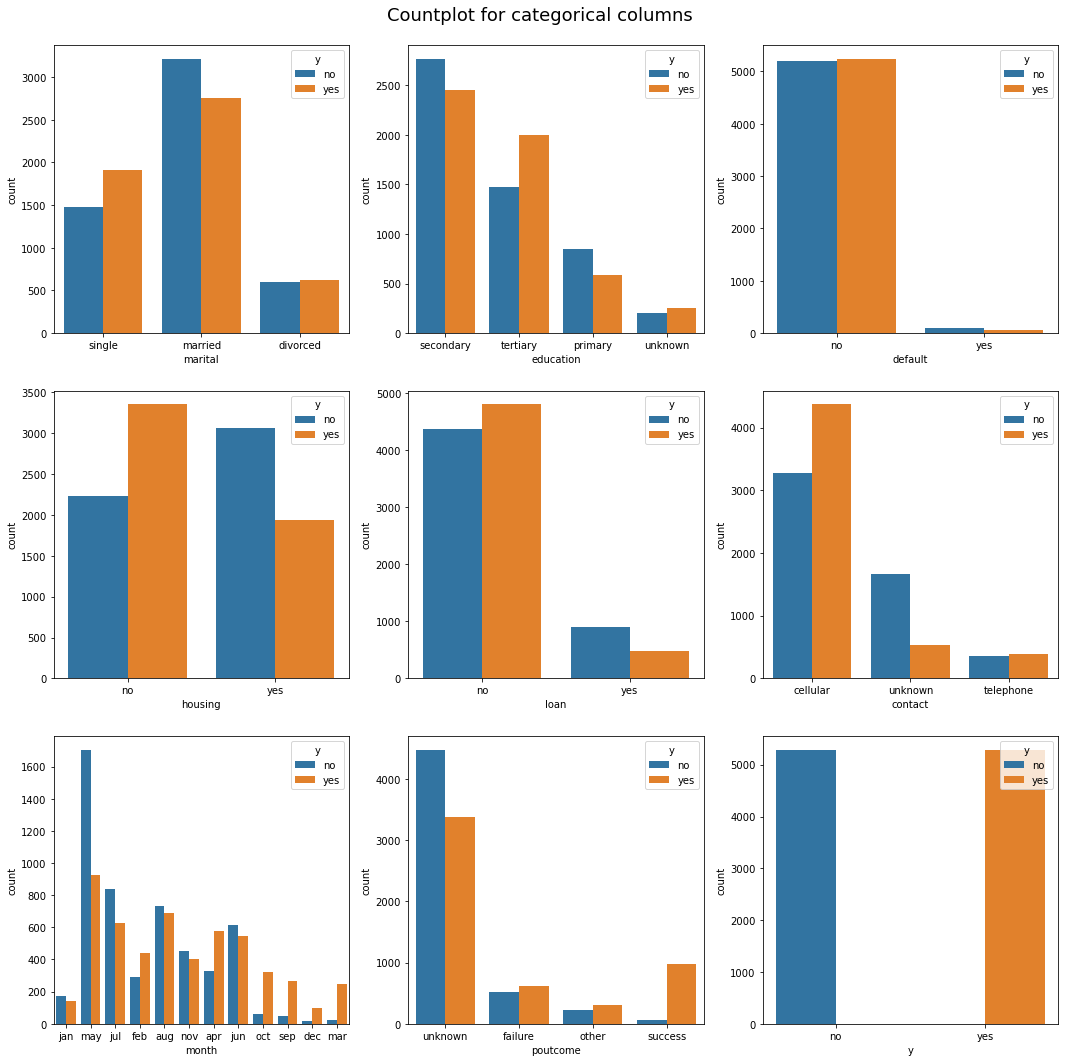

In [89]:
plt.figure(figsize=[18, 18])
for i, column in enumerate(categorical_columns[1:]):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = column, hue = 'y', data=bank_sampled)
plt.suptitle('Countplot for categorical columns', size=18, y=0.91)
plt.plot()

Here, we can see that the **unknown** values of `job` and `education` does not contain much of data and it does not effect a particular class too much. So this can be removed.

## 6. Further Processing of Data

As decided earlier we have to remove the columns `contact` and `poutcome` and the **unknown** values from `job` and `education`.

### Remove Unknown values

In [98]:
modified_bank_data = bank_sampled.drop(bank_sampled[bank_sampled.job=='unknown'].index)
modified_bank_data = modified_bank_data.drop(modified_bank_data[modified_bank_data.education=='unknown'].index)
modified_bank_data.reset_index(drop=True, inplace=True)
modified_bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,unemployed,single,secondary,no,1055,no,no,cellular,28,jan,196,1,-1,0,unknown,no
1,36,blue-collar,married,secondary,no,520,yes,no,unknown,23,may,110,2,-1,0,unknown,no
2,38,technician,single,tertiary,no,1314,yes,yes,cellular,16,jul,378,2,-1,0,unknown,no
3,41,unemployed,married,tertiary,no,28,yes,no,cellular,4,feb,358,2,-1,0,unknown,no
4,27,technician,single,tertiary,no,290,no,no,cellular,10,aug,88,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
10078,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
10079,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
10080,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


### Drop Columns `contact` and `poutcome`

In [99]:
modified_bank_data.drop(columns=['contact', 'poutcome'], inplace=True)
modified_bank_data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,28,unemployed,single,secondary,no,1055,no,no,28,jan,196,1,-1,0,no
1,36,blue-collar,married,secondary,no,520,yes,no,23,may,110,2,-1,0,no
2,38,technician,single,tertiary,no,1314,yes,yes,16,jul,378,2,-1,0,no
3,41,unemployed,married,tertiary,no,28,yes,no,4,feb,358,2,-1,0,no
4,27,technician,single,tertiary,no,290,no,no,10,aug,88,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,73,retired,married,secondary,no,2850,no,no,17,nov,300,1,40,8,yes
10078,25,technician,single,secondary,no,505,no,yes,17,nov,386,2,-1,0,yes
10079,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
10080,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes


### Converting Categorical Columns into Numerical Columns

- Let's first convert all categorical columns into numerical columns using LabelEncoder. We will need to store these categorical columns in a dictionary so that we can later add this to our data frame replacing the categorical ones with these numerical ones.

In [100]:
categorical_columns.remove('contact')
categorical_columns.remove('poutcome')
categorical_columns

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']

In [101]:
categorical_columns_dict = {}
for column in categorical_columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    categorical_columns_dict[column] = le.fit_transform(modified_bank_data[column])

In [102]:
categorical_columns_dict

{'job': array([10,  1,  9, ...,  9,  5,  5]),
 'marital': array([2, 1, 2, ..., 1, 0, 1]),
 'education': array([1, 1, 2, ..., 2, 0, 1]),
 'default': array([0, 0, 0, ..., 0, 0, 0]),
 'housing': array([0, 1, 1, ..., 0, 0, 0]),
 'loan': array([0, 0, 1, ..., 0, 0, 0]),
 'month': array([4, 8, 5, ..., 9, 9, 9]),
 'y': array([0, 0, 0, ..., 1, 1, 1])}

In [103]:
num_data_frame = pd.DataFrame.from_dict(categorical_columns_dict)
num_data_frame

,job,marital,education,default,housing,loan,month,y
0,10,2,1,0,0,0,4,0
1,1,1,1,0,1,0,8,0
2,9,2,2,0,1,1,5,0
3,10,1,2,0,1,0,3,0
4,9,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
10077,5,1,1,0,0,0,9,1
10078,9,2,1,0,0,1,9,1
10079,9,1,2,0,0,0,9,1
10080,5,0,0,0,0,0,9,1


- Let's drop the categorical columns which we need to replace with the numerical one's

In [104]:
modified_bank_data = modified_bank_data.drop(categorical_columns, axis=1)
modified_bank_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,28,1055,28,196,1,-1,0
1,36,520,23,110,2,-1,0
2,38,1314,16,378,2,-1,0
3,41,28,4,358,2,-1,0
4,27,290,10,88,1,-1,0


In [105]:
modified_bank_data = pd.concat([modified_bank_data, num_data_frame], axis=1)
modified_bank_data

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,month,y
0,28,1055,28,196,1,-1,0,10,2,1,0,0,0,4,0
1,36,520,23,110,2,-1,0,1,1,1,0,1,0,8,0
2,38,1314,16,378,2,-1,0,9,2,2,0,1,1,5,0
3,41,28,4,358,2,-1,0,10,1,2,0,1,0,3,0
4,27,290,10,88,1,-1,0,9,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,73,2850,17,300,1,40,8,5,1,1,0,0,0,9,1
10078,25,505,17,386,2,-1,0,9,2,1,0,0,1,9,1
10079,51,825,17,977,3,-1,0,9,1,2,0,0,0,9,1
10080,71,1729,17,456,2,-1,0,5,0,0,0,0,0,9,1


### Outliers

In [106]:
from scipy import stats
z = np.abs(stats.zscore(modified_bank_data.loc[:, numerical_columns]))
print(z)

[[1.09544255 0.14677949 1.48763513 ... 0.57500873 0.4854446  0.24062725]
 [0.42181746 0.31890323 0.89220783 ... 0.19060199 0.4854446  0.24062725]
 [0.25341119 0.06345229 0.05860961 ... 0.19060199 0.4854446  0.24062725]
 ...
 [0.84122959 0.22077661 0.17769507 ... 0.19380475 0.4854446  0.24062725]
 [2.52529232 0.07006425 0.17769507 ... 0.19060199 0.4854446  0.24062725]
 [2.60949546 1.35246654 0.17769507 ... 0.96261822 1.21061252 0.59333766]]


In [107]:
np.array(np.where(z>3)).shape

(2, 870)

It gives the Z-score values for our dataset. It gives 2 arrays one contains the row and another contains the columns. Now we will remove all the rows which have any one outlier whose z-score is above 3. In total it found 870 outlier values. We will drop them based on rows. There can be multiple outliers present on a single row.

In [108]:
cleaned_bank_data = modified_bank_data[(z < 3).all(axis=1)]

In [109]:
cleaned_bank_data.reset_index(drop=True, inplace=True)
cleaned_bank_data

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,month,y
0,28,1055,28,196,1,-1,0,10,2,1,0,0,0,4,0
1,36,520,23,110,2,-1,0,1,1,1,0,1,0,8,0
2,38,1314,16,378,2,-1,0,9,2,2,0,1,1,5,0
3,41,28,4,358,2,-1,0,10,1,2,0,1,0,3,0
4,27,290,10,88,1,-1,0,9,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,73,2850,17,300,1,40,8,5,1,1,0,0,0,9,1
9239,25,505,17,386,2,-1,0,9,2,1,0,0,1,9,1
9240,51,825,17,977,3,-1,0,9,1,2,0,0,0,9,1
9241,71,1729,17,456,2,-1,0,5,0,0,0,0,0,9,1


In [110]:
print(bank_sampled.y.value_counts())
print(modified_bank_data.y.value_counts())
cleaned_bank_data.y.value_counts()

no     5289
yes    5289
Name: y, dtype: int64
0    5061
1    5021
Name: y, dtype: int64


0    4769
1    4474
Name: y, dtype: int64

In [111]:
5289-4769 + 5289-4474

1335

So after removing the **unknown** values and the outliers from our data, we have removed 1135 rows in total. But the ratio of classes of `y` is not affected much. So it will not give a problem.

### Normalizing data


In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
Normalized_bank_data = scaler.fit_transform(cleaned_bank_data.iloc[:, :-1])
Normalized_bank_data = pd.DataFrame(Normalized_bank_data, columns=cleaned_bank_data.columns[:-1])
Normalized_bank_data = pd.DataFrame(pd.concat([Normalized_bank_data, cleaned_bank_data.y], axis=1), columns=cleaned_bank_data.columns)
Normalized_bank_data

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,month,y
0,0.172414,0.299280,0.900000,0.135266,0.000000,0.000000,0.000000,1.0,1.0,0.5,0.0,0.0,0.0,0.363636,0
1,0.310345,0.260351,0.733333,0.075914,0.111111,0.000000,0.000000,0.1,0.5,0.5,0.0,1.0,0.0,0.727273,0
2,0.344828,0.318126,0.500000,0.260870,0.111111,0.000000,0.000000,0.9,1.0,1.0,0.0,1.0,1.0,0.454545,0
3,0.396552,0.224551,0.100000,0.247067,0.111111,0.000000,0.000000,1.0,0.5,1.0,0.0,1.0,0.0,0.272727,0
4,0.155172,0.243615,0.300000,0.060732,0.000000,0.000000,0.000000,0.9,1.0,1.0,0.0,0.0,0.0,0.090909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.948276,0.429892,0.533333,0.207039,0.000000,0.107895,0.727273,0.5,0.5,0.5,0.0,0.0,0.0,0.818182,1
9239,0.120690,0.259259,0.533333,0.266391,0.111111,0.000000,0.000000,0.9,1.0,0.5,0.0,0.0,1.0,0.818182,1
9240,0.568966,0.282544,0.533333,0.674258,0.222222,0.000000,0.000000,0.9,0.5,1.0,0.0,0.0,0.0,0.818182,1
9241,0.913793,0.348323,0.533333,0.314700,0.111111,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.818182,1


### Pairplot of all numerical columns with y

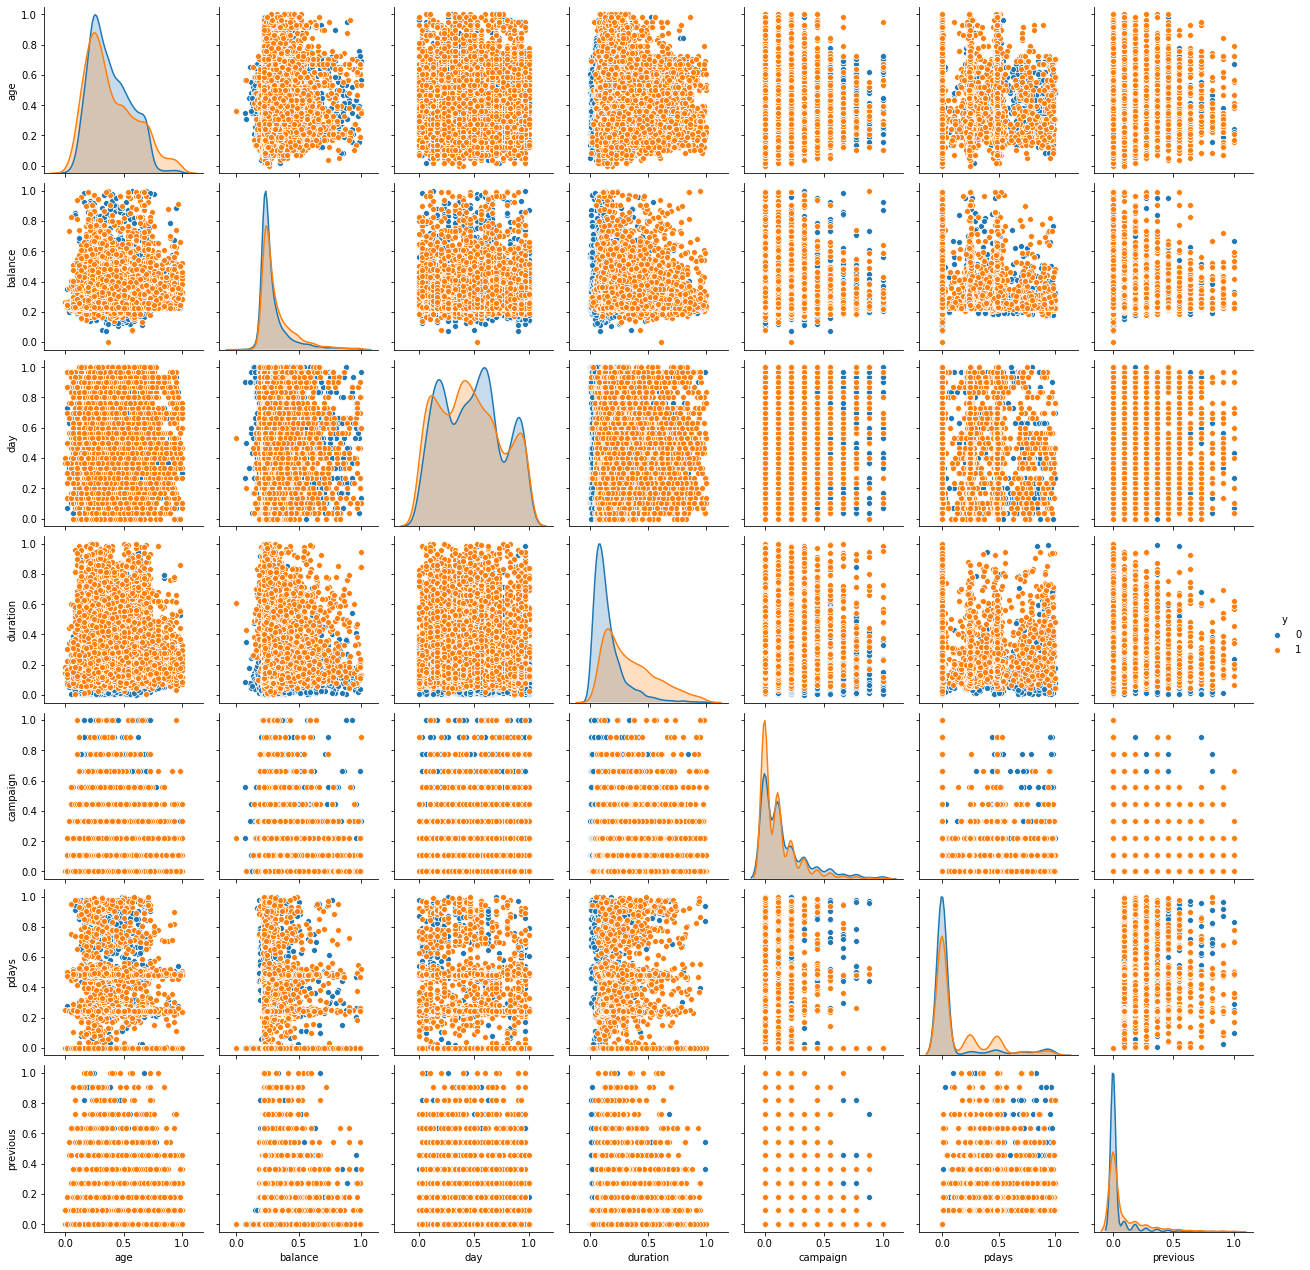

In [121]:
sns.pairplot(data=Normalized_bank_data, hue='y', vars=numerical_columns)

### Checking Correlation using Heatmap

<AxesSubplot:>

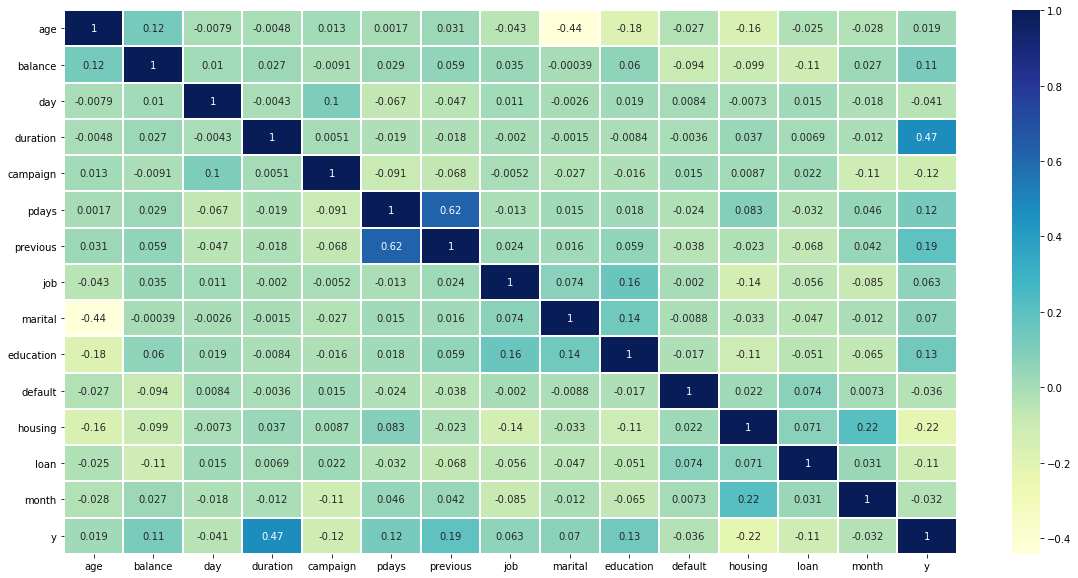

In [122]:
# Plotting it after removing outliers
plt.figure(figsize=[20,10])
sns.heatmap(Normalized_bank_data.corr(),annot=True, linewidths=1, cmap='YlGnBu')

The heatmap above shows the correlation between variables in the dataset. It shows how variables are dependent on each other and by what factor and also their nature of dependency (directly or inversely proportional). By seeing at the heatmap we can see that the top 8 features that affect the quality of wine are `duration`, `housing`, `previous`, `education`, `pdays`, `campaign`, `loan`, `balance`.

## 7. Modelling

In [123]:
useful_features = ['duration', 'housing', 'previous', 'education', 'pdays', 'campaign', 'loan', 'balance']

### Split the data into X and y

In [124]:
X = Normalized_bank_data.iloc[:, :-1]
Y = Normalized_bank_data.y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(6932, 14) (2311, 14)


### a. KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
knn = KNeighborsClassifier()

# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= knn, param_grid={'n_neighbors':range(2,20)}, scoring='accuracy', cv=10)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_knn.fit(X_train, y_train)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))

Train Accuracy:   78.7%
CV Mean Accuracy: 75.5%
Test Accuracy:    75.7%


### b. SVM

In [126]:
from sklearn.svm import SVC
svm = SVC(random_state=42)

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1,10]
pg_svm=[{'C':r, 'kernel':['linear']},{'C':r, 'gamma':r, 'kernel':['rbf']}]

gs_svm=GridSearchCV(estimator= svm, param_grid= pg_svm, scoring='accuracy', cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_svm.fit(X_train, y_train)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_svm.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_svm_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_svm.score(X_test, y_test)*100))

Train Accuracy:   82.9%
CV Mean Accuracy: 80.5%
Test Accuracy:    80.5%


### c. Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf= RFC(random_state=42)

# grid searh to choose the best (combination of) hyperparameters
pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rf=GridSearchCV(estimator= rf, param_grid= pg_rf, scoring='accuracy', cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_test)*100))

Train Accuracy:   100.0%
CV Mean Accuracy: 83.5%
Test Accuracy:    82.7%


### Result Metrics

Since Random Forest performed best among all so we will use RandomForest as our model.

In [129]:
model = gs_rf_best

In [130]:
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:,1]

#### Confusion matrix

In [131]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, rf_predictions)

array([[943, 237],
       [162, 969]], dtype=int64)

#### Classification Report

In [132]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1180
           1       0.80      0.86      0.83      1131

    accuracy                           0.83      2311
   macro avg       0.83      0.83      0.83      2311
weighted avg       0.83      0.83      0.83      2311



#### ROC Curve

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8994833580602137

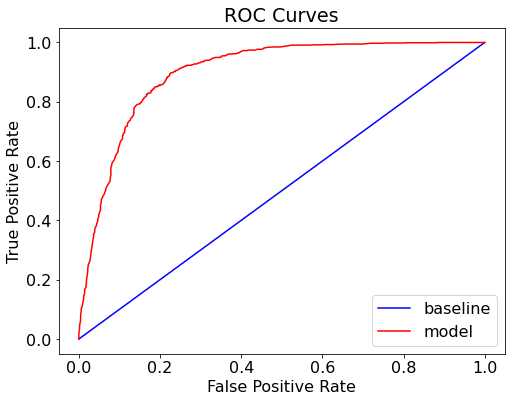

In [134]:
base_fpr, base_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
model_fpr, model_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16

# Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate'); plt.title('ROC Curves')
plt.show()